<a href="https://colab.research.google.com/github/Wakalkar/Codtech-Internship/blob/main/Image_Classification_Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Class names (optional)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3524 - loss: 1.7453 - val_accuracy: 0.5687 - val_loss: 1.2027
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.5849 - loss: 1.1688 - val_accuracy: 0.6192 - val_loss: 1.0690
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6475 - loss: 1.0032 - val_accuracy: 0.6663 - val_loss: 0.9560
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6885 - loss: 0.8833 - val_accuracy: 0.6816 - val_loss: 0.9244
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7169 - loss: 0.8095 - val_accuracy: 0.6890 - val_loss: 0.8871
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7396 - loss: 0.7457 - val_accuracy: 0.6849 - val_loss: 0.9115
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.7541 - loss: 0.6981 - val_accuracy: 0.6999 - val_loss: 0.8566
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7709 -

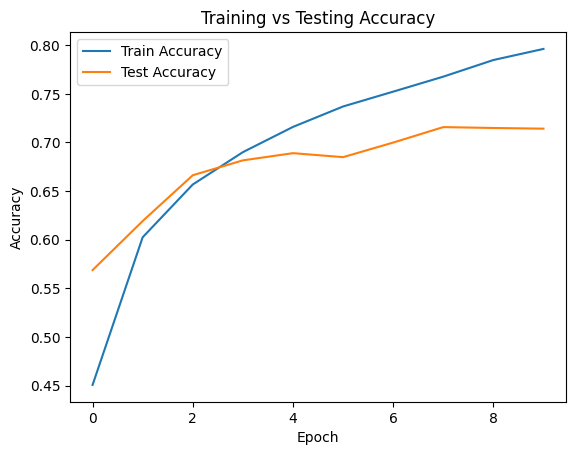

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing Accuracy')
plt.show()


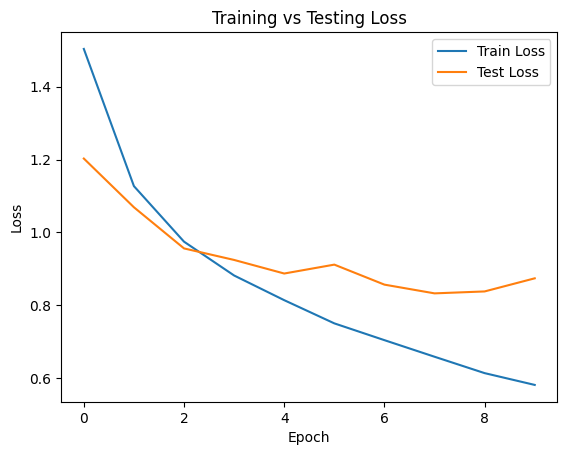

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Testing Loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


<ipython-input-8-84d063a4339f>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[int(y_test[i])]}")


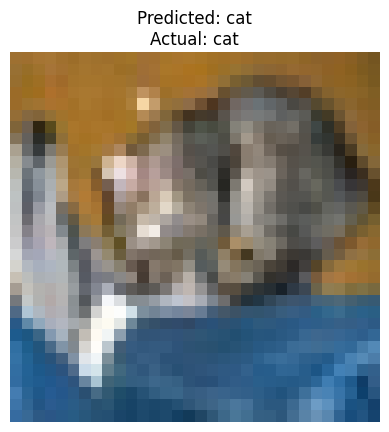

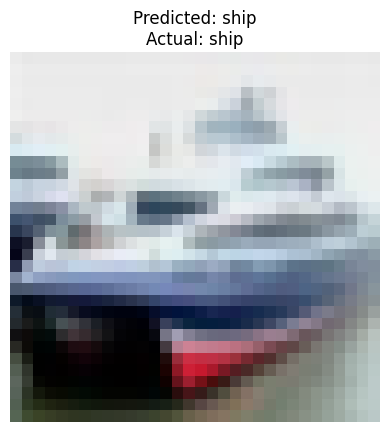

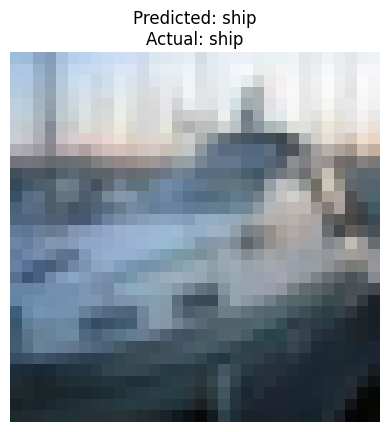

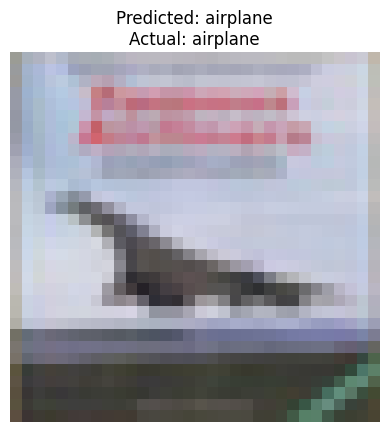

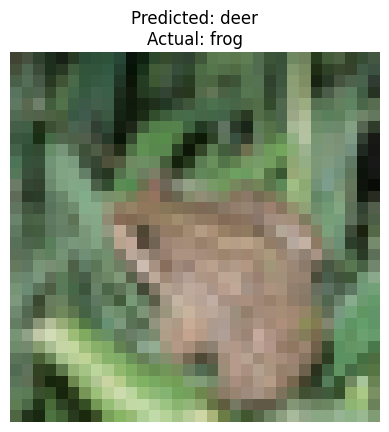

In [ ]:
# Use softmax to convert logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Show first 5 predictions
for i in range(5):
    plt.figure()
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[int(y_test[i])]}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save('cifar10_image_classifier.h5')


In [ ]:
from google.colab import files
files.download('cifar10_image_classifier.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>